# Calculating Position Detla

## 1. Delta for Single Leg strategy

XYZ call option 10 계약을 가지고 있고, 각 call 의 delta 가 0.75 인 경우. 1 계약이 100 주라고 가정.

이것은 XYZ call option 이 750 주에 해당한다는 것을 의미함. 주가가 1 불 하락하면 position 이 750 불 감소함.

In [5]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

In [6]:
def PositionDelta(delta, contracts, sharesPerContract):

delta = 0.75
contracts = 10
contractPerShares = 100

positionDelta = delta * contracts * contractPerShares
print(positionDelta)

750.0


## 2. Multiple Leg 와 Multiple Strategy 의 Position Delta 계산

two leg 를 가진 long call strategy 의 예.

56.55 불에 거래되고 있는 같은 만기일의 XYZ call 옵션을 0.61 delta 55 strike call 을 15 계약 매입하고, 0.29 delta 의 60 strke 15 계약 매도하여 long call spread 구성.

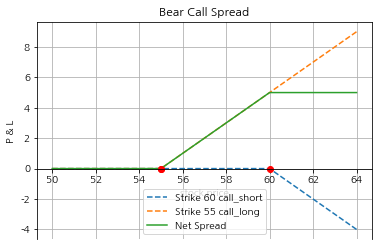

In [8]:
st = np.arange(50, 65, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

# 콜옵션 매도
strike1 = 60 
premium= 0

payoff = short_call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call_short'.format(strike1),'dashed')
total_payoff += payoff

# 더 낮은 행사가의 콜옵션 매수
strike2 = 55
premium= 0

payoff = long_call_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call_long'.format(strike2),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike2, fig, ax, 'Net Spread','solid')

plt.title('Bear Call Spread');